   # Lending Club Case Study
    Nikhil N Barigidad

<hr style="border:0.2px solid gray"> </hr>
A consumer finance company which specialises in lending various types of loans to urban customers wants assistance to reduce their credit loss.

**Business Understanding**\
The company has to make a decision when it receives a loan application, i.e. whether to approve it or not. The 2 type of risk associated here are:
 * If the applicant is likely to repay the loan, then not approving the loan
 * If the applicant is not likely to repay the loan, then approving the loan
 
Using the data given of the past loan applicants, identification of such patterns must be done that can help us to  find the next defaulters.

**Business Objective**
Here the objective is  to understand the driving factors/driver variables which result in to loan defaults. Using this knowledge the company can calculate the risk before lending money to a customer.


In [1]:
import numpy as np
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
loan = pd.read_csv('loan.csv',dtype=object)
loan.shape

(39717, 111)

In [3]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


# Data Cleaning

In [4]:
# Check for duplicate rows in dataset based on id column
loan[loan.duplicated(['id'])]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [5]:
#dropping all the columns which have all null values
loan.dropna(how='all', axis=1, inplace=True)


In [6]:
#percentage of null values in each columns
(loan.isnull().sum() * 100 / len(loan)).round(2).sort_values(ascending=False).head(15)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
home_ownership                 0.00
dtype: float64

In [7]:
#droping the columns wwith more than 30% null value
loan=loan.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'], axis=1)

In [8]:
(loan.isnull().sum() * 100 / len(loan)).round(2).sort_values(ascending=False).head(12)

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
total_rec_prncp               0.00
out_prncp                     0.00
dtype: float64

In [9]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0


In [10]:
#Dropping columns with only one unique value as it will not impact in the analysis
loan = loan.loc[:, loan.nunique() != 1]

In [11]:
loan.shape

(39717, 44)

In [12]:
#emp_title has almost 72% of unique values, dropping this column to ease analysis
loan = loan.drop(['emp_title'], axis=1)

In [13]:
#deling_2yrs % values of '0'
print(loan.delinq_2yrs.unique())
print((loan[loan['delinq_2yrs'] == '0'].shape[0]/loan.shape[0])*100)

['0' '2' '3' '1' '4' '6' '5' '8' '7' '9' '11']
89.1431880554926


In [14]:
#pub_rec % values of '0'
print(loan.pub_rec.unique())
print((loan[loan['pub_rec'] == '0'].shape[0]/loan.shape[0])*100)

['0' '1' '2' '3' '4']
94.6723065689755


In [15]:
#pub_rec_bankruptcies % values of '0'
print(loan.pub_rec_bankruptcies.unique())
print((loan[loan['pub_rec_bankruptcies'] == '0'].shape[0]/loan.shape[0])*100)

['0' '1' '2' nan]
94.01263942392426


In [16]:
#out_prncp % values of '0'
print(loan.out_prncp.unique())
print((loan[loan['out_prncp'] == '0'].shape[0]/loan.shape[0])*100)

['0' '524.06' '1849.1' ... '19.12' '13.28' '79.24']
97.12969257496789


In [17]:
#out_prncp_inv % values of '0'
print(loan.out_prncp_inv.unique())
print((loan[loan['out_prncp_inv'] == '0'].shape[0]/loan.shape[0])*100)

['0' '524.06' '1844.43' ... '19.09' '13.28' '79.24']
97.12969257496789


In [18]:
#total_rec_late_fee % values of '0'
print(loan.total_rec_late_fee.unique())
print((loan[loan['total_rec_late_fee'] == '0'].shape[0]/loan.shape[0])*100)

['0' '16.97' '15.00000003' ... '1.69' '1.36' '19.89']
94.8485535161266


In [19]:
#recoveries % values of '0'
print(loan.recoveries.unique())
print((loan[loan['recoveries'] == '0'].shape[0]/loan.shape[0])*100)

['0' '117.08' '189.06' ... '304.2' '35.7' '21.29']
89.37986252738122


In [20]:
#collection_recovery_fee % values of '0'
print(loan.collection_recovery_fee.unique())
print((loan[loan['collection_recovery_fee'] == '0'].shape[0]/loan.shape[0])*100)

['0' '1.11' '2.09' ... '668.36' '444.25' '0.23']
90.47762922677947


In [21]:
#dropping all the above columns as only one value accumulates more than 85% of the total data
loan = loan.drop(['delinq_2yrs', 'pub_rec', 'pub_rec_bankruptcies', 'out_prncp', 
                  'out_prncp_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee'], axis=1)

In [22]:
#dropping 'url' column as it not needed in further analysis
loan = loan.drop(['url'], axis=1)

In [23]:
#Removing 'months' from term column 
loan['term'] = loan['term'].str.rstrip(" months")

In [24]:
#Removing '%' from int_rate
loan['int_rate'] = loan['int_rate'].str.rstrip("%")

In [25]:
#Removing "years" from the end of emp_length values
loan['emp_length'] = loan['emp_length'].str.rstrip(" years")
#emp_length has <1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10+
#value <1 can be considered as 0 and value 10+ can be taken as 10
loan['emp_length'] = loan['emp_length'].replace({'10+':'10', '< 1':'0'})

In [26]:
#Removing '%' from revol_util
loan['revol_util'] = loan['revol_util'].str.rstrip("%")

In [27]:
#splitting dates into fifferent columns
loan['issue_month'], loan['issue_year'] = loan['issue_d'].str.split('-').str
loan['earliest_cr_line_month'], loan['earliest_cr_line_year'] = loan['earliest_cr_line'].str.split('-').str
loan['last_pymnt_month'], loan['last_pymnt_year'] = loan['last_pymnt_d'].str.split('-').str
loan['last_credit_pull_month'], loan['last_credit_pull_year'] = loan['last_credit_pull_d'].str.split('-').str

#dropping combined columns
loan = loan.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis=1)

In [28]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,last_pymnt_amnt,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_month,last_pymnt_year,last_credit_pull_month,last_credit_pull_year
0,1077501,1296599,5000,5000,4975,36,10.65,162.87,B,B2,...,863.16,171.62,Dec,11,Jan,85,Jan,15,May,16
1,1077430,1314167,2500,2500,2500,60,15.27,59.83,C,C4,...,435.17,119.66,Dec,11,Apr,99,Apr,13,Sep,13
2,1077175,1313524,2400,2400,2400,36,15.96,84.33,C,C5,...,605.67,649.91,Dec,11,Nov,01,Jun,14,May,16
3,1076863,1277178,10000,10000,10000,36,13.49,339.31,C,C1,...,2214.92,357.48,Dec,11,Feb,96,Jan,15,Apr,16
4,1075358,1311748,3000,3000,3000,60,12.69,67.79,B,B5,...,1037.39,67.79,Dec,11,Jan,96,May,16,May,16


In [29]:
float_columns = ['loan_amnt', 'funded_amnt', 'emp_length','funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 
                 'dti', 'revol_bal', 'revol_util', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',	'total_rec_int',
                 'last_pymnt_amnt']
int_columns = ['inq_last_6mths', 'open_acc', 'total_acc', 'int_rate']

str_columns = ['home_ownership', 'verification_status', 'loan_status', 'purpose', 'title']

loan[float_columns] = loan[float_columns].astype(np.float)
loan[int_columns] = loan[int_columns].astype(np.int)
loan[str_columns] = loan[str_columns].astype(str)

In [30]:
loan = loan.applymap(lambda s: s.lower() if type(s) == str else s)

In [31]:
loan.dtypes

id                         object
member_id                  object
loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
term                       object
int_rate                    int64
installment               float64
grade                      object
sub_grade                  object
emp_length                float64
home_ownership             object
annual_inc                float64
verification_status        object
loan_status                object
purpose                    object
title                      object
zip_code                   object
addr_state                 object
dti                       float64
inq_last_6mths              int64
open_acc                    int64
revol_bal                 float64
revol_util                float64
total_acc                   int64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prncp           float64
total_rec_int             float64
last_pymnt_amn

In [32]:
(loan.isnull().sum() * 100 / len(loan)).round(2).sort_values(ascending=False).head(12)

emp_length                2.71
last_pymnt_year           0.18
last_pymnt_month          0.18
revol_util                0.13
last_credit_pull_year     0.01
last_credit_pull_month    0.01
total_rec_prncp           0.00
revol_bal                 0.00
total_acc                 0.00
total_pymnt               0.00
total_pymnt_inv           0.00
last_pymnt_amnt           0.00
dtype: float64

In [33]:
#Fill na values median of each column
loan = loan.fillna(loan.median())

In [34]:
#droping row which have null values
loan.drop(loan[loan['last_pymnt_month'].isnull()].index, inplace = True)
loan.drop(loan[loan['title'].isnull()].index, inplace = True)
loan.drop(loan[loan['last_credit_pull_month'].isnull()].index, inplace = True)

In [35]:
(loan.isnull().sum() * 100 / len(loan)).round(2).sort_values(ascending=False).head(12)

id                 0.0
total_rec_int      0.0
open_acc           0.0
revol_bal          0.0
revol_util         0.0
total_acc          0.0
total_pymnt        0.0
total_pymnt_inv    0.0
total_rec_prncp    0.0
last_pymnt_amnt    0.0
member_id          0.0
issue_month        0.0
dtype: float64

In [36]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39644 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39644 non-null  object 
 1   member_id               39644 non-null  object 
 2   loan_amnt               39644 non-null  float64
 3   funded_amnt             39644 non-null  float64
 4   funded_amnt_inv         39644 non-null  float64
 5   term                    39644 non-null  object 
 6   int_rate                39644 non-null  int64  
 7   installment             39644 non-null  float64
 8   grade                   39644 non-null  object 
 9   sub_grade               39644 non-null  object 
 10  emp_length              39644 non-null  float64
 11  home_ownership          39644 non-null  object 
 12  annual_inc              39644 non-null  float64
 13  verification_status     39644 non-null  object 
 14  loan_status             39644 non-null

In [37]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,last_pymnt_amnt,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_month,last_pymnt_year,last_credit_pull_month,last_credit_pull_year
0,1077501,1296599,5000.0,5000.0,4975.0,36,10,162.87,b,b2,...,863.16,171.62,dec,11,jan,85,jan,15,may,16
1,1077430,1314167,2500.0,2500.0,2500.0,60,15,59.83,c,c4,...,435.17,119.66,dec,11,apr,99,apr,13,sep,13
2,1077175,1313524,2400.0,2400.0,2400.0,36,15,84.33,c,c5,...,605.67,649.91,dec,11,nov,01,jun,14,may,16
3,1076863,1277178,10000.0,10000.0,10000.0,36,13,339.31,c,c1,...,2214.92,357.48,dec,11,feb,96,jan,15,apr,16
4,1075358,1311748,3000.0,3000.0,3000.0,60,12,67.79,b,b5,...,1037.39,67.79,dec,11,jan,96,may,16,may,16


# Univariate Analysis

### Importatnt Columns for Univariate analysis
* loan_amnt
* funded_amnt
* term
* int_rate
* grade
* emp_length
* annual_inc 
* home_ownership
* verification status
* loan_status
* purpose
* dti
* addr_state

In [38]:
"""
Function: countplot - To draw countplot of a given variable/column

Parameters:
    variable : variable/column of which countplot has to be drawn

Returns:
None
Shows countplot of a given variable
"""
def countplot(variable):
    plt.figure(figsize=(15,8))
    plt.subplot(2, 2, 2)
    ax = sns.countplot(x=loan[variable])
    ax.set_xlabel(variable.replace('_', ' '),fontsize=14)
    ax.set_ylabel(variable.replace('_', ' ') + 'Count',fontsize=14) 

    print(loan[variable].value_counts())
    plt.show()

In [39]:
"""
Function: boxplot - To draw boxplot of a given variable/column

Parameters:
    variable : variable/column of which boxplot has to be drawn

Returns:
None
Shows boxplot of a given variable
"""
def boxplot(variable):
    plt.figure(figsize=(15,8))
    plt.subplot(2, 2, 2)
    ax = sns.boxplot(y=loan[variable])
    ax.set_title(variable.replace('_', ' ')+' - Box Plot',fontsize=16)
    ax.set_ylabel(variable.replace('_', ' '),fontsize=14)
    plt.show()

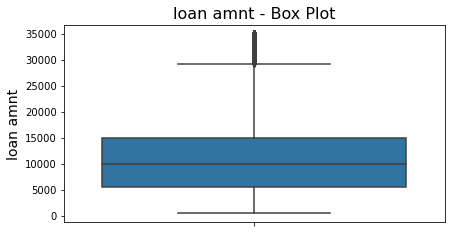

In [40]:
# Univariate Analysis on Loan amount Variables

boxplot('loan_amnt')

#Inference: The loan amount varies from 0 to 35,000 having mean of 10,000

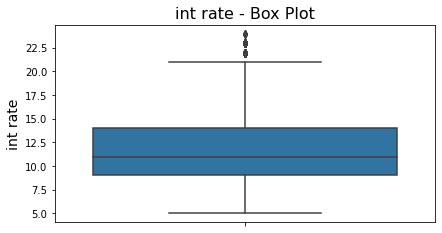

In [41]:
# Univariate Analysis on intrest rate Variables

boxplot('int_rate')

#Inference: Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

fully paid     32949
charged off     5555
current         1140
Name: loan_status, dtype: int64


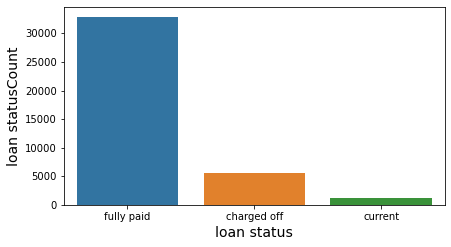

In [42]:
# Univariate Analysis on Loan Status Variables

countplot('loan_status')
#Inference: Below plot shows that close to 14% loans were charged off out of total loan issued(as 5553 is 14% of 39633)

b    12005
a    10078
c     8073
d     5294
e     2833
f     1047
g      314
Name: grade, dtype: int64


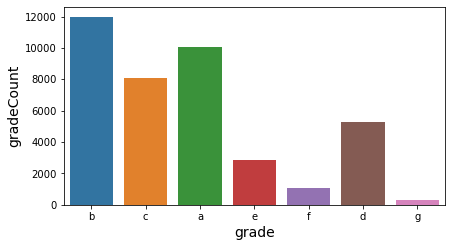

In [43]:
# Univariate Analysis on grade Variables

countplot('grade')

#Inference: Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

10.0    8870
0.0     4574
4.0     4498
2.0     4382
3.0     4088
5.0     3272
1.0     3229
6.0     2228
7.0     1772
8.0     1476
9.0     1255
Name: emp_length, dtype: int64


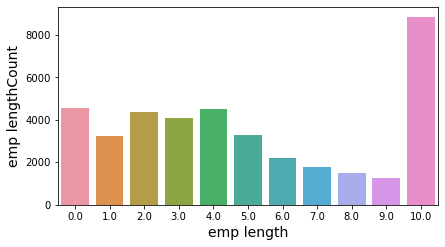

In [44]:
# Univariate Analysis on Employee Working Experience Variables

countplot('emp_length')

#Inference: Majority of employees applying for the loan have more than 10 years of experience

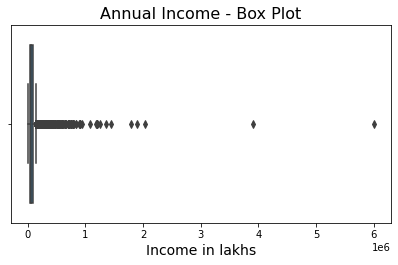

In [45]:
# Univariate Analysis on Annual income Variables

plt.figure(figsize=(15,8))
plt.subplot(2, 2, 2)
ax = sns.boxplot(x=loan['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16)
ax.set_xlabel('Income in lakhs',fontsize=14)
plt.show()

#Inference: There are only two applicants having annual income of more than 30 lakhs

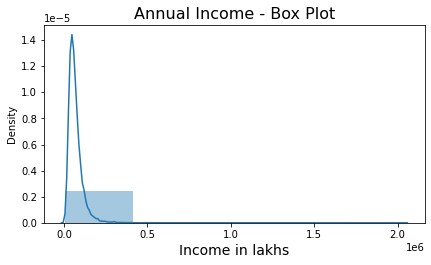

In [46]:
# Univariate Analysis on Loan amount below 30 lakhs

plt.figure(figsize=(15,8))
plt.subplot(2, 2, 2)
ax = sns.distplot(loan[loan['annual_inc'] < 3000000]['annual_inc'], bins=5)
ax.set_title('Annual Income - Box Plot',fontsize=16)
ax.set_xlabel('Income in lakhs',fontsize=14)
plt.show()

#Inference: Most of the applicants have annual income less that 5 lakhs

rent        18846
mortgage    17644
own          3053
other          98
none            3
Name: home_ownership, dtype: int64


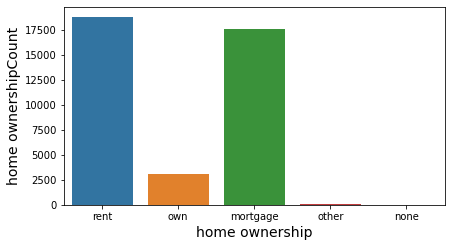

In [47]:
# Univariate Analysis on Home ownership Variable

countplot('home_ownership')

#Inference: Most of the house ownership of the customers are in either mortgaged state or in Rented state

not verified       16882
verified           12789
source verified     9973
Name: verification_status, dtype: int64


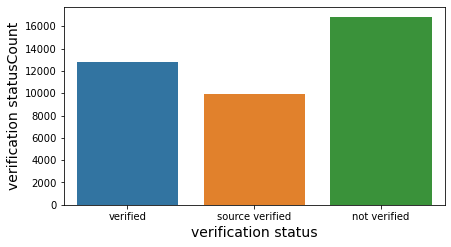

In [48]:
# Univariate Analysis on Verification status Variable

countplot('verification_status')

#Inference: Most of the customers are not verified

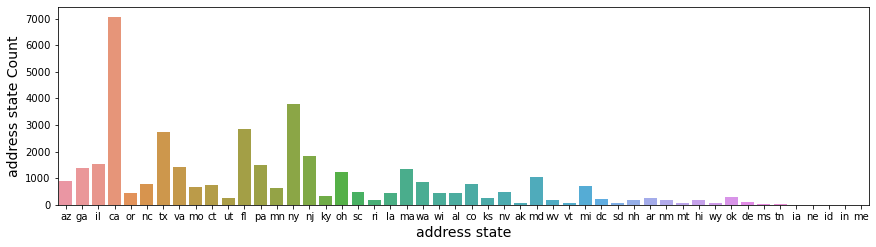

In [49]:
# Univariate Analysis on address states Variable
plt.figure(figsize=(32,8))
plt.subplot(2, 2, 2)
ax = sns.countplot(x=loan['addr_state'])
ax.set_xlabel('address state',fontsize=14, )
ax.set_ylabel('address state Count',fontsize=14)

plt.show()

#Inference: CA, California has the most number of loans in the country

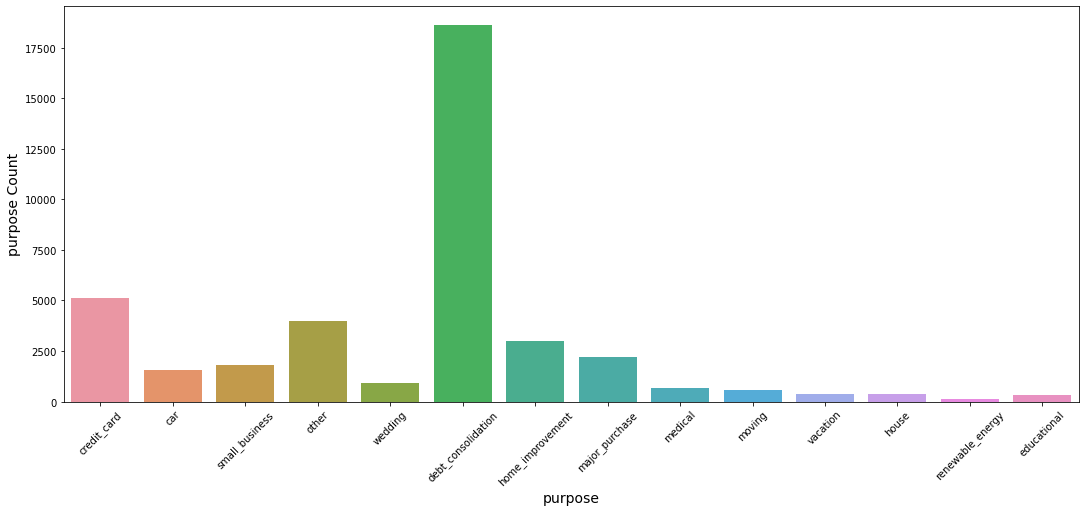

In [50]:
# Univariate Analysis on purpose Variable
plt.figure(figsize=(40,16))
plt.subplot(2, 2, 2)
ax = sns.countplot(x=loan['purpose'])
ax.set_xlabel('purpose',fontsize=14, )
ax.set_ylabel('purpose Count',fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()
# Inference: debt consolidation variable is the most given purpose for loan

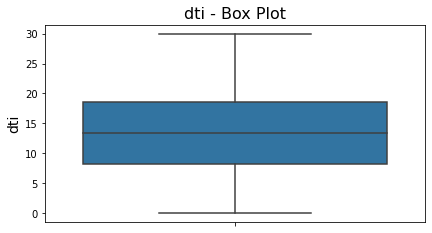

In [51]:
# Univariate Analysis on dti Variable
boxplot('dti')

# Inference: dti varies from around 8% to 19%

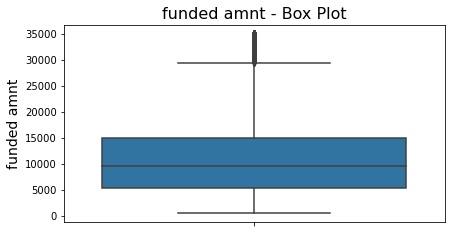

In [52]:
# Univariate Analysis on funded amnt Variable
boxplot('funded_amnt')

# Inference: funded amount varies from 5000 - 35000 with mean around 10000

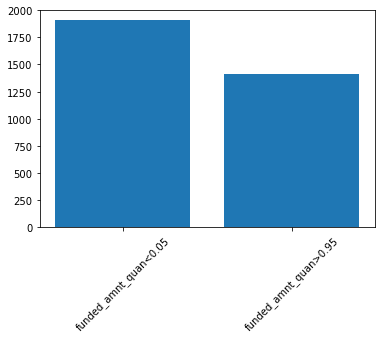

Totl values between quantile range 0.05 and 0.95: 3318


In [53]:
# Univariate Analysis on funded amount outlier bins
funded_amnt_quantiles = ['funded_amnt_quan<0.05', 'funded_amnt_quan>0.95']
funded_amnt_quantiles_count = [loan[loan['funded_amnt'] < loan['funded_amnt'].quantile(0.05)].shape[0], 
                               loan[loan['funded_amnt'] > loan['funded_amnt'].quantile(0.95)].shape[0]]
plt.bar(funded_amnt_quantiles,
            funded_amnt_quantiles_count)
plt.xticks(funded_amnt_quantiles, rotation=45)
plt.show()
print("Totl values between quantile range 0.05 and 0.95:",loan[loan['funded_amnt'] < loan['funded_amnt'].quantile(0.05)].shape[0] + loan[loan['funded_amnt'] > loan['funded_amnt'].quantile(0.95)].shape[0])

# Inference: 3318 fields are potential outliers in the funded_amnt column

 36    29041
 60    10603
Name: term, dtype: int64


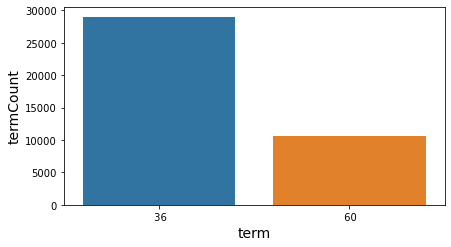

In [54]:
# Univariate Analysis on term variable
countplot('term')

#Inference: Most of the loans are for 36 months term

# Derived Columns

In [55]:
"""
Function: PercentileCut - To perform quantile cut on the column values

Parameters:
    data : defaulted to 'loan'
    column : this is the continuous numeric field which has to be binned to its percentiles

Returns:
None
Creates a new column in the data with a suffix '_qctg' and this contains the newly created category
"""
def PercentileCut (*, data=loan, column):
    new_column = column + '_qctg'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [56]:
# Deriving new column 'loan_amnt_qctg' from 'loan_amnt'
PercentileCut(column='loan_amnt')

In [57]:
# Deriving new column 'annual_inc_qctg' from 'annual_inc'
PercentileCut(column='annual_inc')

In [58]:
# Deriving new column 'int_rate_qctg' from 'int_rate'
PercentileCut(column='int_rate')

In [59]:
PercentileCut(column='installment')

In [60]:
# Deriving new column 'dti_qctg' from 'dti'
PercentileCut(column='dti')

# Bivariate Analysis

### loan_amnt vs funded_amnt

- To find out difference between loan amount and amount funded

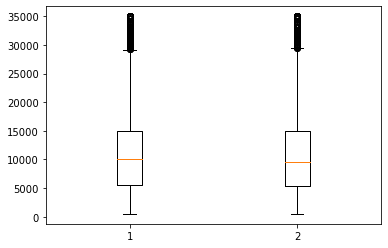

 loan_amnt mean   = 11225.07 
 funded_amnt mean = 10952.84


In [61]:
plt.boxplot([loan['loan_amnt'], loan['funded_amnt']])
plt.show()
print(" loan_amnt mean   =", round(loan['loan_amnt'].mean(),2),"\n", "funded_amnt mean =",round(loan['funded_amnt'].mean(),2))

`As we can see loan_amnt is slightly greater than funded_amnt`

### loan_amnt vs term

In [62]:
print("Sum of loan_amnt by term")
print(loan[['loan_amnt', 'term']].groupby('term').sum())
print("--------------------------------\n")
print("Mean of loan_amnt by term")
print(loan[['loan_amnt', 'term']].groupby('term').mean())

Sum of loan_amnt by term
        loan_amnt
term             
 36   278734650.0
 60   166272150.0
--------------------------------

Mean of loan_amnt by term
         loan_amnt
term              
 36    9597.970111
 60   15681.613694


Inference: 
* As we can see mean amount for 36 months is less than mean amount for 60 months
* Although mean amount for 36 term is less than 60 months, the total sum of loan is greater for 36 term loans



### loan_amnt vs emp_length

In [63]:
loan_emp_length_agg = loan[['loan_amnt', 'emp_length']].groupby('emp_length', as_index=False).sum()

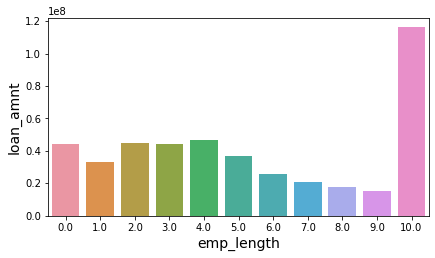

In [64]:
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 2)
ax = sns.barplot(x=loan_emp_length_agg['emp_length'], y=loan_emp_length_agg['loan_amnt'])
ax.set_xlabel('emp_length',fontsize=14)
ax.set_ylabel('loan_amnt',fontsize=14)
plt.show() 

Inference: 
*   Maximum loan amount is taken from the people with 10 or more years of employement
*   Least amount of loan is taken from the people with 9yrs of employment length



### loan_amnt_qctg vs loan_status

In [65]:
loan_amnt_qctg_vs_loan_status = loan.groupby(['loan_amnt_qctg', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loan_amnt_qctg_vs_loan_status['ratio'] = (loan_amnt_qctg_vs_loan_status['charged off']*100/loan_amnt_qctg_vs_loan_status['fully paid'])

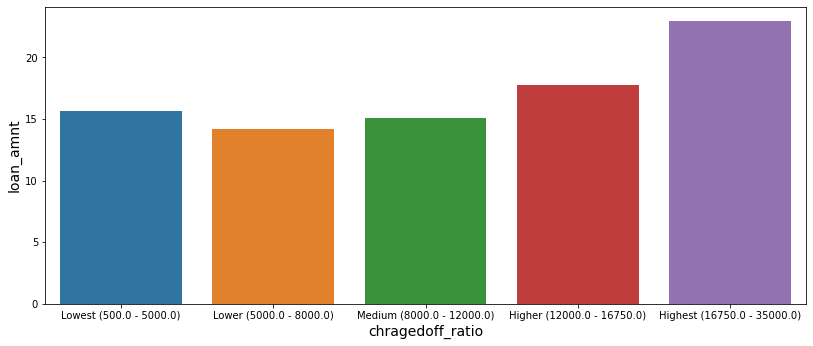

In [66]:
plt.figure(figsize=(30,12))
plt.subplot(2, 2, 2)
ax = sns.barplot(x=loan_amnt_qctg_vs_loan_status['loan_amnt_qctg'], y=loan_amnt_qctg_vs_loan_status['ratio'])
ax.set_xlabel('chragedoff_ratio',fontsize=14)
ax.set_ylabel('loan_amnt',fontsize=14)
plt.show() 

### loan_amnt vs home_ownership

In [67]:
loan_home_ownership_agg = loan[['loan_amnt', 'home_ownership']].groupby('home_ownership', as_index=False).sum()

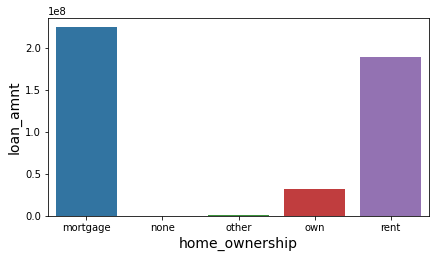

In [68]:
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 2)
ax = sns.barplot(x=loan_home_ownership_agg['home_ownership'], y=loan_home_ownership_agg['loan_amnt'])
ax.set_xlabel('home_ownership',fontsize=14)
ax.set_ylabel('loan_amnt',fontsize=14)
plt.show() 

Inference:

* Loan amount is most for mortgage type of home_ownership
* Leaving other, own home owners has loan_amnt sum very less



### loan_amnt vs addr_state

In [69]:
loan_addr_st_agg = loan[['loan_amnt', 'addr_state']].groupby('addr_state', as_index=False).sum()

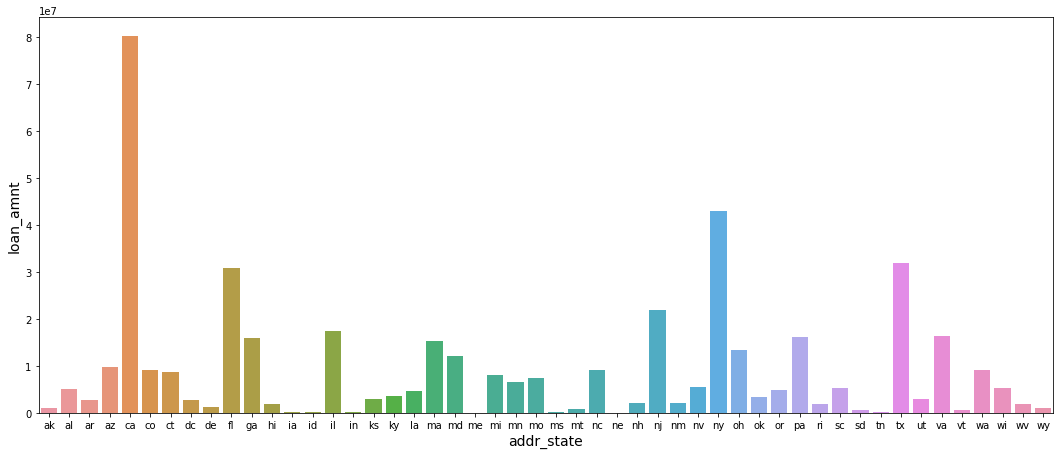

In [70]:
plt.figure(figsize=(40,16))
plt.subplot(2, 2, 2)
ax = sns.barplot(x=loan_addr_st_agg['addr_state'], y=loan_addr_st_agg['loan_amnt'])
ax.set_xlabel('addr_state',fontsize=14)
ax.set_ylabel('loan_amnt',fontsize=14)
plt.show() 

Inference: 
* Loan amount is highest for 'ca', 80186800
* Loan amount is least for 'ak', 9200

In [71]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,earliest_cr_line_year,last_pymnt_month,last_pymnt_year,last_credit_pull_month,last_credit_pull_year,loan_amnt_qctg,annual_inc_qctg,int_rate_qctg,installment_qctg,dti_qctg
0,1077501,1296599,5000.0,5000.0,4975.0,36,10,162.87,b,b2,...,85,jan,15,may,16,Lowest (500.0 - 5000.0),Lowest (4000.0 - 37500.0),Lower (7.0 - 10.0),Lower (150.84 - 231.59),Highest (19.75 - 29.99)
1,1077430,1314167,2500.0,2500.0,2500.0,60,15,59.83,c,c4,...,99,apr,13,sep,13,Lowest (500.0 - 5000.0),Lowest (4000.0 - 37500.0),Higher (12.0 - 15.0),Lowest (15.69 - 150.84),Lowest (0.0 - 6.98)
2,1077175,1313524,2400.0,2400.0,2400.0,36,15,84.33,c,c5,...,01,jun,14,may,16,Lowest (500.0 - 5000.0),Lowest (4000.0 - 37500.0),Higher (12.0 - 15.0),Lowest (15.69 - 150.84),Lower (6.98 - 11.38)
3,1076863,1277178,10000.0,10000.0,10000.0,36,13,339.31,c,c1,...,96,jan,15,apr,16,Medium (8000.0 - 12000.0),Lower (37500.0 - 50400.0),Higher (12.0 - 15.0),Higher (330.76 - 483.38),Highest (19.75 - 29.99)
4,1075358,1311748,3000.0,3000.0,3000.0,60,12,67.79,b,b5,...,96,may,16,may,16,Lowest (500.0 - 5000.0),Higher (66000.0 - 90000.0),Medium (10.0 - 12.0),Lowest (15.69 - 150.84),Higher (15.36 - 19.75)


### loan_status vs purpose


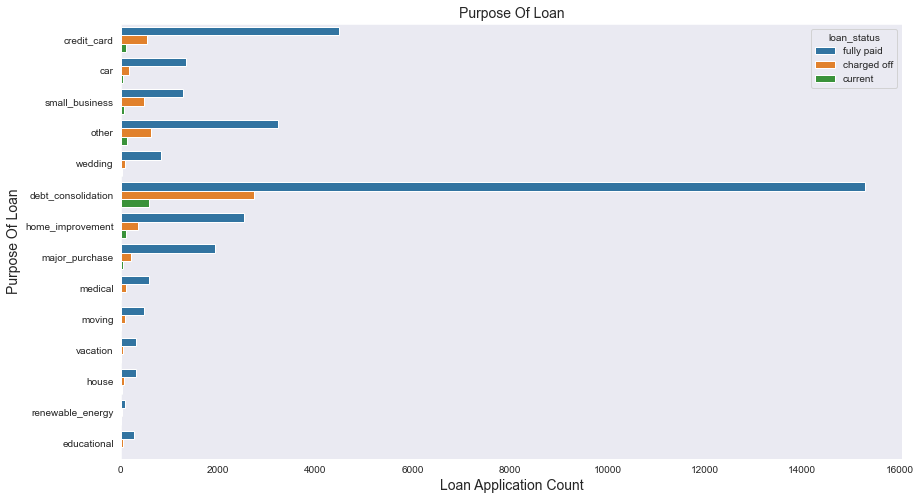

In [72]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status')
ax.set_title('Purpose Of Loan',fontsize=14)
ax.set_ylabel('Purpose Of Loan',fontsize=14)
ax.set_xlabel('Loan Application Count',fontsize=14)      
plt.show()

In [73]:
purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['ratio'] = (purpose_vs_loan['charged off']*100/purpose_vs_loan['fully paid'])
purpose_vs_loan

loan_status,purpose,charged off,current,fully paid,ratio
0,car,160.0,50.0,1339.0,11.949216
1,credit_card,539.0,103.0,4485.0,12.017837
2,debt_consolidation,2738.0,586.0,15288.0,17.909471
3,educational,53.0,0.0,269.0,19.702602
4,home_improvement,344.0,101.0,2528.0,13.607595
5,house,57.0,14.0,308.0,18.506494
6,major_purchase,217.0,37.0,1928.0,11.255187
7,medical,105.0,12.0,575.0,18.260870
8,moving,92.0,7.0,484.0,19.008264
9,other,623.0,128.0,3231.0,19.281956


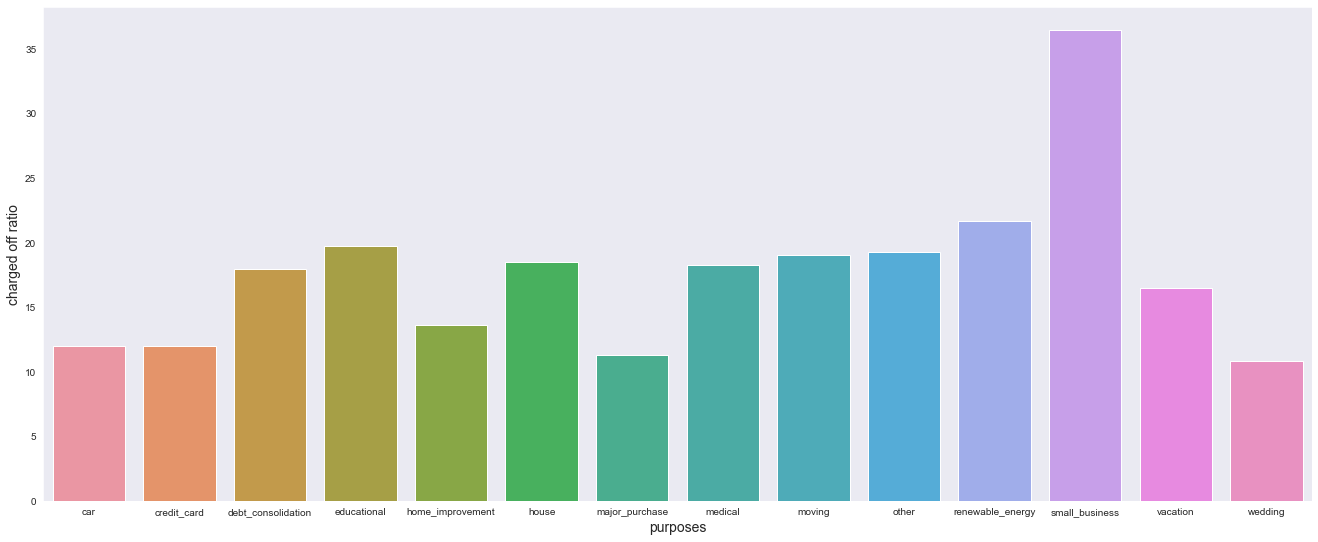

In [74]:
plt.figure(figsize=(50,20))
plt.subplot(2, 2, 2)
ax = sns.barplot(x=purpose_vs_loan['purpose'], y=purpose_vs_loan['ratio'])
ax.set_xlabel('purposes',fontsize=14)
ax.set_ylabel('charged off ratio',fontsize=14)
plt.show() 

Inference: Graph1
* Majority of loan has been given for the debt consolidation purpose and has been fully paid.
* For this categorie the count of charged off is also high
Inference: Graph2
* When chargedoff ratio is comapered it seems that the small_business is highest that any other purpose


### purpose vs issue_year

In [75]:
purpose_vs_issue_year = loan.groupby(['purpose', 'issue_year']).purpose.count().unstack().fillna(0).reset_index()

In [76]:
purpose_vs_issue_year

issue_year,purpose,07,08,09,10,11
0,car,3.0,41.0,167.0,402.0,936.0
1,credit_card,43.0,270.0,569.0,1434.0,2811.0
2,debt_consolidation,78.0,625.0,1981.0,5308.0,10620.0
3,educational,12.0,53.0,158.0,99.0,0.0
4,home_improvement,22.0,96.0,335.0,849.0,1671.0
5,house,1.0,13.0,61.0,90.0,214.0
6,major_purchase,5.0,61.0,231.0,810.0,1075.0
7,medical,2.0,26.0,83.0,201.0,380.0
8,moving,6.0,20.0,57.0,197.0,303.0
9,other,41.0,213.0,581.0,1287.0,1860.0


In [77]:
purpose_vs_issue_year = pd.melt(purpose_vs_issue_year, id_vars='purpose', var_name="source", 
                                value_name="value_numbers")

In [78]:
purpose_vs_issue_year

,purpose,source,value_numbers
0,car,07,3.0
1,credit_card,07,43.0
2,debt_consolidation,07,78.0
3,educational,07,12.0
4,home_improvement,07,22.0
...,...,...,...
65,other,11,1860.0
66,renewable_energy,11,58.0
67,small_business,11,967.0
68,vacation,11,227.0


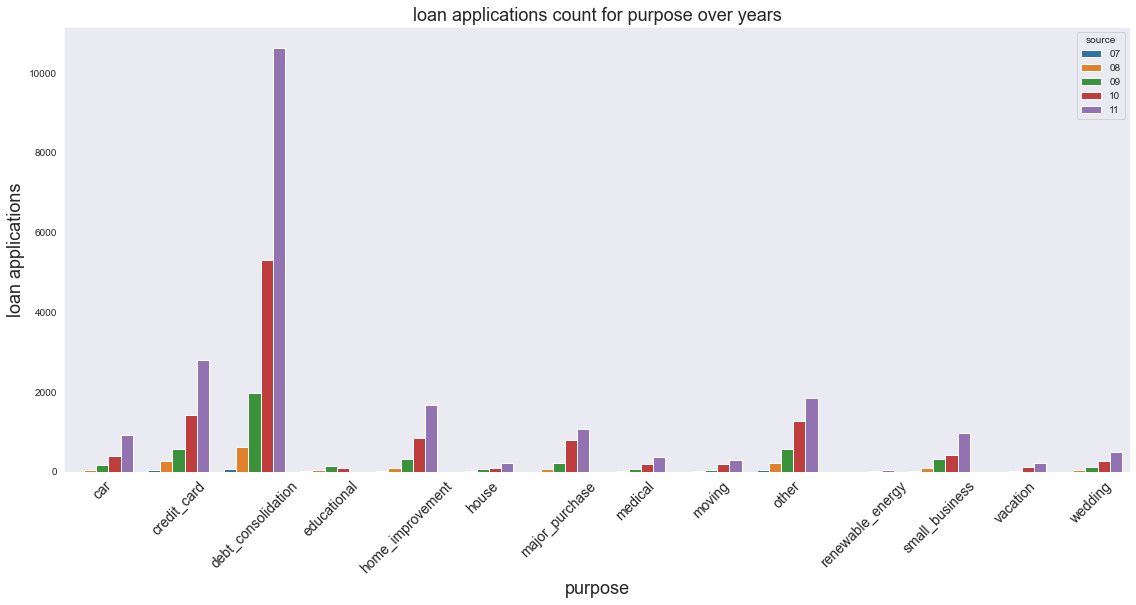

In [79]:
plt.figure(figsize=(42,18))
plt.subplot(2, 2, 2)
ax = sns.barplot(x='purpose', y='value_numbers', hue="source", data=purpose_vs_issue_year)
ax.set_xlabel('purpose',fontsize=18)
ax.set_ylabel('loan applications',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontdict={'fontsize':14})
#ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontsize':14})
ax.set_title("loan applications count for purpose over years", fontsize=18)
plt.show()

Inference: 
* Charge off ratio being highest for `small_business`, we can also see that the loan amount is increasing over the years
* Over the years loan amount `educational` and `renewable_energy` is stagnant
* Over the years loan amount for `debt_consolidation` is increasing exponentially

### loan_status vs term






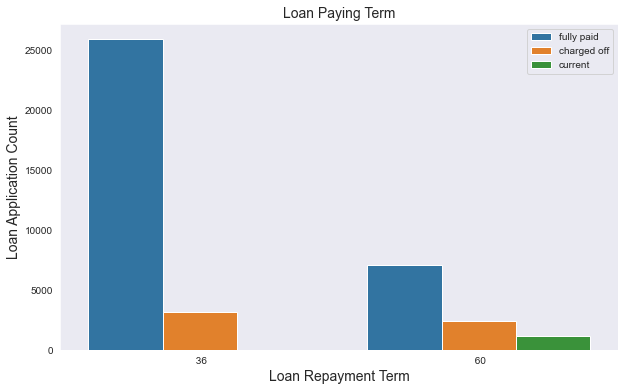

In [80]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="term",data=loan,hue='loan_status')

ax.set_title('Loan Paying Term',fontsize=14)
ax.set_xlabel('Loan Repayment Term',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

Inference: 
* We can see the ratio of charged off is higher when an applicant's term is of 60 months

### loan_status vs home_ownership

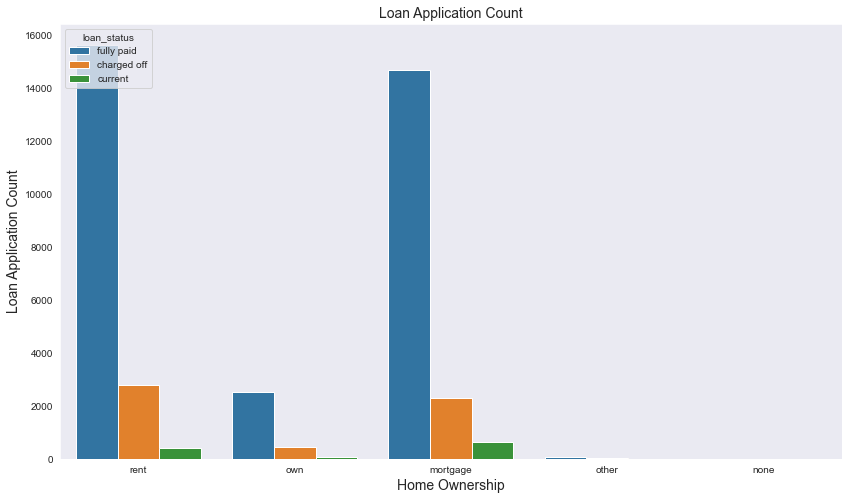

In [81]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status')
ax.set_title('Loan Application Count',fontsize=14)
ax.set_ylabel('Loan Application Count',fontsize=14)
ax.set_xlabel('Home Ownership',fontsize=14)      
plt.show()

### loan_status vs grade

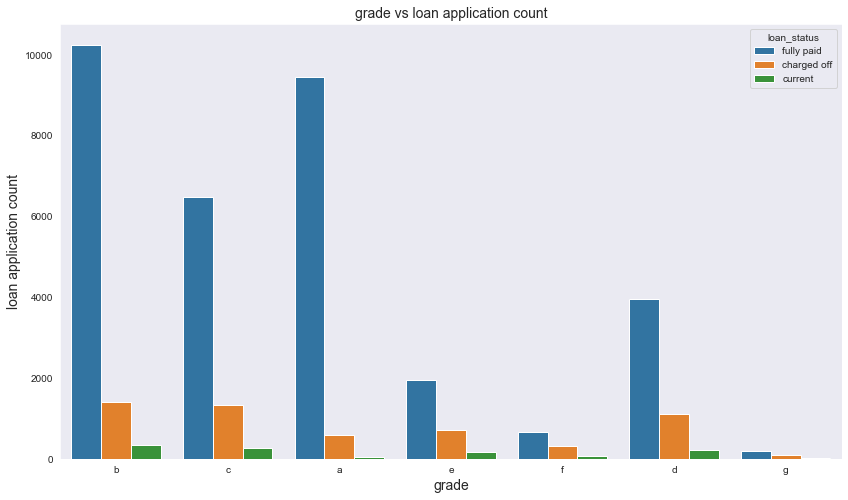

In [82]:
plt.figure(figsize=(14,8))
sns.set_style("dark")
ax = sns.countplot(x="grade",data=loan,hue='loan_status')
ax.set_title('grade vs loan application count',fontsize=14)
ax.set_xlabel('grade',fontsize=14)
ax.set_ylabel('loan application count',fontsize=14)      
plt.show()

Interface: 
* Charged off count is most for grade `b`
* Charged off count is least for `g`

In [83]:
loan_grade_status = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().reset_index()
loan_grade_status['ratio'] = (loan_grade_status['charged off']*100/loan_grade_status['fully paid'])
loan_grade_status

loan_status,grade,charged off,current,fully paid,ratio
0,a,596,40,9442,6.312222
1,b,1410,345,10250,13.756098
2,c,1322,264,6487,20.379220
3,d,1105,222,3967,27.854802
4,e,706,179,1948,36.242300
5,f,317,73,657,48.249619
6,g,99,17,198,50.000000


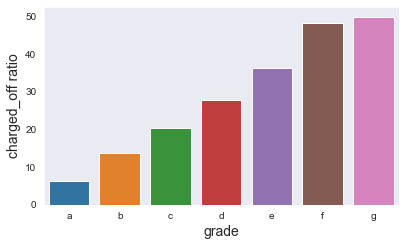

In [84]:
plt.figure(figsize=(14,8))
plt.subplot(2, 2, 2)
ax = sns.barplot(x=loan_grade_status['grade'], y=loan_grade_status['ratio'])
ax.set_xlabel('grade',fontsize=14)
ax.set_ylabel('charged_off ratio',fontsize=14)
plt.show() 

Inference: 
* In loan_status vs grade bar plot we saw that grade `b` have highest number of charged off loan applications, but the ratio of charged off to fully paid for grade `b` is second least in this plot - This means that only around 13% of fully paid loan applications are charged off.
* And grade `g` having least number of charged off count, has around 50% of charged off to fully paid ratio - From this we can infer that loans of grades `f` and `g` are most likely to be charged off

In [85]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,earliest_cr_line_year,last_pymnt_month,last_pymnt_year,last_credit_pull_month,last_credit_pull_year,loan_amnt_qctg,annual_inc_qctg,int_rate_qctg,installment_qctg,dti_qctg
0,1077501,1296599,5000.0,5000.0,4975.0,36,10,162.87,b,b2,...,85,jan,15,may,16,Lowest (500.0 - 5000.0),Lowest (4000.0 - 37500.0),Lower (7.0 - 10.0),Lower (150.84 - 231.59),Highest (19.75 - 29.99)
1,1077430,1314167,2500.0,2500.0,2500.0,60,15,59.83,c,c4,...,99,apr,13,sep,13,Lowest (500.0 - 5000.0),Lowest (4000.0 - 37500.0),Higher (12.0 - 15.0),Lowest (15.69 - 150.84),Lowest (0.0 - 6.98)
2,1077175,1313524,2400.0,2400.0,2400.0,36,15,84.33,c,c5,...,01,jun,14,may,16,Lowest (500.0 - 5000.0),Lowest (4000.0 - 37500.0),Higher (12.0 - 15.0),Lowest (15.69 - 150.84),Lower (6.98 - 11.38)
3,1076863,1277178,10000.0,10000.0,10000.0,36,13,339.31,c,c1,...,96,jan,15,apr,16,Medium (8000.0 - 12000.0),Lower (37500.0 - 50400.0),Higher (12.0 - 15.0),Higher (330.76 - 483.38),Highest (19.75 - 29.99)
4,1075358,1311748,3000.0,3000.0,3000.0,60,12,67.79,b,b5,...,96,may,16,may,16,Lowest (500.0 - 5000.0),Higher (66000.0 - 90000.0),Medium (10.0 - 12.0),Lowest (15.69 - 150.84),Higher (15.36 - 19.75)


### int_rate vs grade

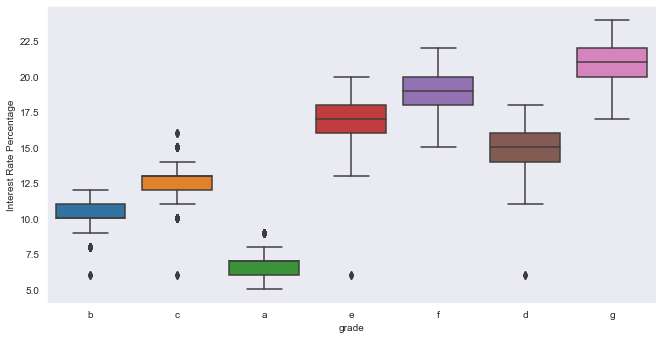

In [86]:
plt.figure(figsize=(24,12))
plt.subplot(2, 2, 2)
sns.boxplot(y='int_rate', x='grade', data=loan)
plt.ylabel('Interest Rate Percentage')
plt.show()

Inference: 
* Interest rate for grade `g` is highest among the grades, this might be the reason for the highest charged off ratio
* Interest rate for grade `a` is least among all the grades, thus having least charged off ratio

### funded_amnt vs grade

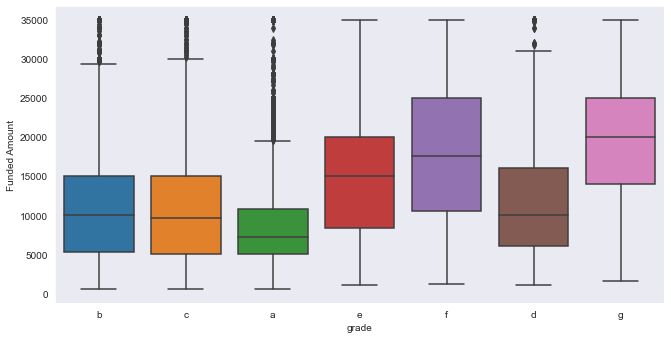

In [87]:
plt.figure(figsize=(24,12))
plt.subplot(2, 2, 2)
sns.boxplot(y='funded_amnt', x='grade', data=loan)
plt.ylabel('Funded Amount')
plt.show()

Inference:
* Mean funded amount is highest for grade `g`
* Mean funded amount is least for grade `a`

### annual_inc vs loan_status

In [88]:
inc_range_vs_loan = loan.groupby(['annual_inc_qctg', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['ratio'] = (inc_range_vs_loan['charged off']*100/inc_range_vs_loan['fully paid'])

In [89]:
inc_range_vs_loan

loan_status,annual_inc_qctg,charged off,current,fully paid,ratio
0,Lowest (4000.0 - 37500.0),1393,137,6408,21.738452
1,Lower (37500.0 - 50400.0),1215,226,6532,18.600735
2,Medium (50400.0 - 66000.0),1166,235,6674,17.470782
3,Higher (66000.0 - 90000.0),968,272,6669,14.514920
4,Highest (90000.0 - 6000000.0),813,270,6666,12.196220


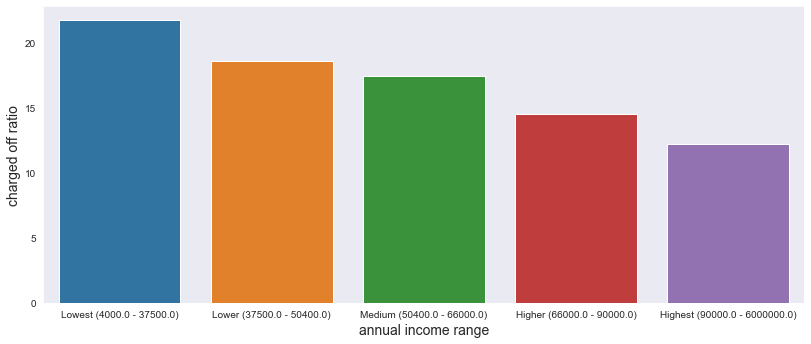

In [90]:
plt.figure(figsize=(30,12))
plt.subplot(2, 2, 2)
ax = sns.barplot(x=inc_range_vs_loan['annual_inc_qctg'], y=inc_range_vs_loan['ratio'])
ax.set_xlabel('annual income range',fontsize=14)
ax.set_ylabel('charged off ratio',fontsize=14)
plt.show() 

Inference: 
* Charged off ratio is highest where the annual income is lowest  

### emp_length vs loan_status

In [91]:
emp_length_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_length_vs_loan['ratio'] = (emp_length_vs_loan['charged off']*100/emp_length_vs_loan['fully paid'])
emp_length_vs_loan

loan_status,emp_length,charged off,current,fully paid,ratio
0,0.0,631,75,3868,16.313340
1,1.0,445,71,2713,16.402506
2,2.0,561,97,3724,15.064447
3,3.0,548,83,3457,15.851895
4,4.0,677,136,3685,18.371777
5,5.0,448,88,2736,16.374269
6,6.0,306,61,1861,16.442773
7,7.0,262,62,1448,18.093923
8,8.0,200,44,1232,16.233766
9,9.0,155,32,1068,14.513109


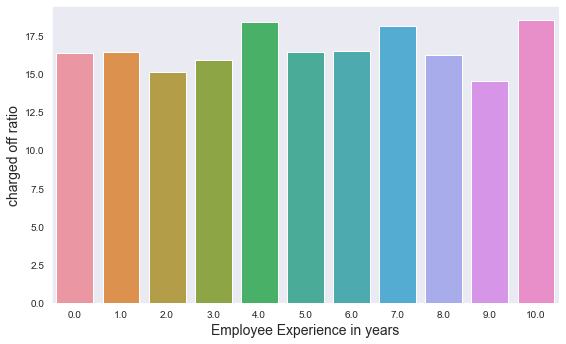

In [92]:
plt.figure(figsize=(20,12))
plt.subplot(2, 2, 2)
ax = sns.barplot(x=emp_length_vs_loan['emp_length'], y=emp_length_vs_loan['ratio'])
ax.set_xlabel('Employee Experience in years',fontsize=14)
ax.set_ylabel('charged off ratio',fontsize=14)
plt.show()

### addr_state vs loan_status

In [93]:
state_vs_loan = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['ratio'] = (state_vs_loan['charged off']*100/state_vs_loan['fully paid'])

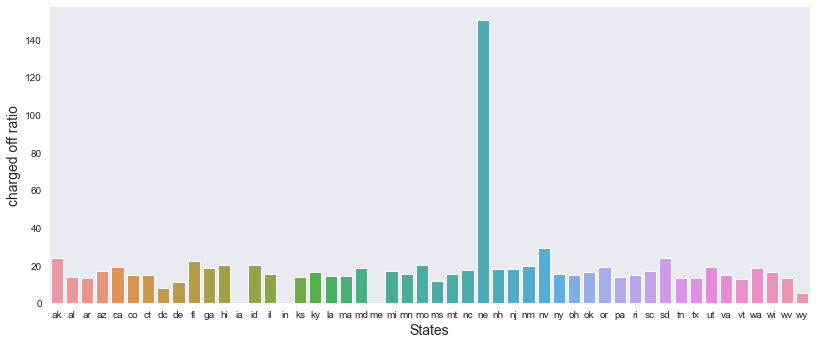

In [94]:
plt.figure(figsize=(30,12))
plt.subplot(2, 2, 2)
ax = sns.barplot(x=state_vs_loan['addr_state'], y=state_vs_loan['ratio'])
ax.set_xlabel('States',fontsize=14)
ax.set_ylabel('charged off ratio',fontsize=14)
plt.show() 

Inference: 
* 'ne' has a  huge charged off ratio as compared to other states

### installment vs loan_status

In [95]:
installment_vs_loan = loan.groupby(['installment_qctg', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
installment_vs_loan['ratio'] = (installment_vs_loan['charged off']*100/installment_vs_loan['fully paid'])
installment_vs_loan

loan_status,installment_qctg,charged off,current,fully paid,ratio
0,Lowest (15.69 - 150.84),1100,138,6691,16.439994
1,Lower (150.84 - 231.59),1019,108,6802,14.980888
2,Medium (231.59 - 330.76),1027,242,6698,15.332935
3,Higher (330.76 - 483.38),1157,288,6449,17.940766
4,Highest (483.38 - 1305.19),1252,364,6309,19.844666


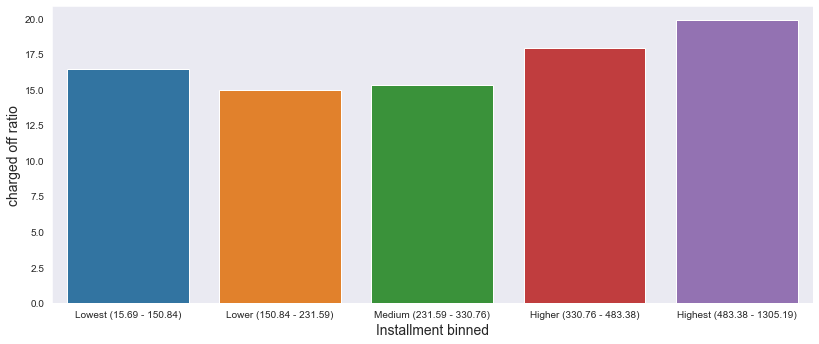

In [96]:
plt.figure(figsize=(30,12))
plt.subplot(2, 2, 2)
ax = sns.barplot(x=installment_vs_loan['installment_qctg'], y=installment_vs_loan['ratio'])
ax.set_xlabel('Installment binned',fontsize=14)
ax.set_ylabel('charged off ratio',fontsize=14)
plt.show()

Inference:
* For highest amd lowest installement bins there is slight increase in the `charge off` ratio

### issue_year vs loan_status

In [97]:
issue_year_vs_loan = loan.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['total_applications'] = issue_year_vs_loan['charged off'] + issue_year_vs_loan['current'] + issue_year_vs_loan['fully paid']
issue_year_vs_loan = issue_year_vs_loan.drop(['current'], axis=1)

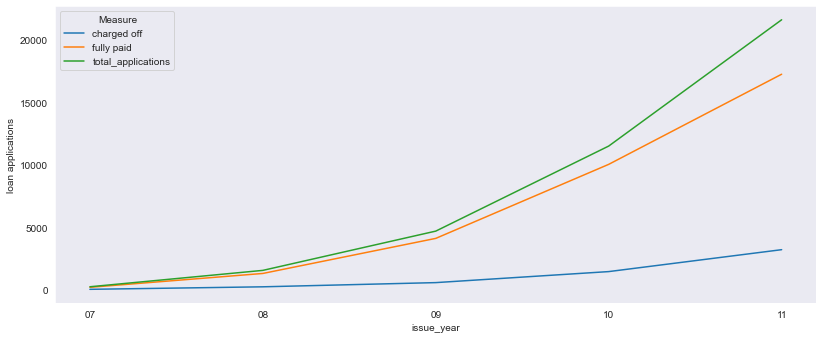

In [98]:
plt.figure(figsize=(30,12))
plt.subplot(2, 2, 2)
sns.lineplot(x='issue_year', y='loan applications', hue='Measure', 
             data=pd.melt(issue_year_vs_loan, 'issue_year', var_name='Measure', 
              value_name='loan applications'))
plt.show()

Inference:
* Total loan applications over the year is increasing exponentially
* Fully paid status of loan are following similar pattern as `total_applications`
* Gap between `charged off` and `fully paid` is increasing over the time

In [99]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,earliest_cr_line_year,last_pymnt_month,last_pymnt_year,last_credit_pull_month,last_credit_pull_year,loan_amnt_qctg,annual_inc_qctg,int_rate_qctg,installment_qctg,dti_qctg
0,1077501,1296599,5000.0,5000.0,4975.0,36,10,162.87,b,b2,...,85,jan,15,may,16,Lowest (500.0 - 5000.0),Lowest (4000.0 - 37500.0),Lower (7.0 - 10.0),Lower (150.84 - 231.59),Highest (19.75 - 29.99)
1,1077430,1314167,2500.0,2500.0,2500.0,60,15,59.83,c,c4,...,99,apr,13,sep,13,Lowest (500.0 - 5000.0),Lowest (4000.0 - 37500.0),Higher (12.0 - 15.0),Lowest (15.69 - 150.84),Lowest (0.0 - 6.98)
2,1077175,1313524,2400.0,2400.0,2400.0,36,15,84.33,c,c5,...,01,jun,14,may,16,Lowest (500.0 - 5000.0),Lowest (4000.0 - 37500.0),Higher (12.0 - 15.0),Lowest (15.69 - 150.84),Lower (6.98 - 11.38)
3,1076863,1277178,10000.0,10000.0,10000.0,36,13,339.31,c,c1,...,96,jan,15,apr,16,Medium (8000.0 - 12000.0),Lower (37500.0 - 50400.0),Higher (12.0 - 15.0),Higher (330.76 - 483.38),Highest (19.75 - 29.99)
4,1075358,1311748,3000.0,3000.0,3000.0,60,12,67.79,b,b5,...,96,may,16,may,16,Lowest (500.0 - 5000.0),Higher (66000.0 - 90000.0),Medium (10.0 - 12.0),Lowest (15.69 - 150.84),Higher (15.36 - 19.75)


### int_rate_qctg vs loan_status

In [100]:
int_rate_qctg_vs_loan_status = loan.groupby(['int_rate_qctg', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_rate_qctg_vs_loan_status['ratio'] = (int_rate_qctg_vs_loan_status['charged off']*100/int_rate_qctg_vs_loan_status['fully paid'])
int_rate_qctg_vs_loan_status

loan_status,int_rate_qctg,charged off,current,fully paid,ratio
0,Lowest (5.0 - 7.0),427,15,7596,5.621380
1,Lower (7.0 - 10.0),846,161,7443,11.366385
2,Medium (10.0 - 12.0),1123,248,6537,17.179134
3,Higher (12.0 - 15.0),1598,255,7449,21.452544
4,Highest (15.0 - 24.0),1561,461,3924,39.780836


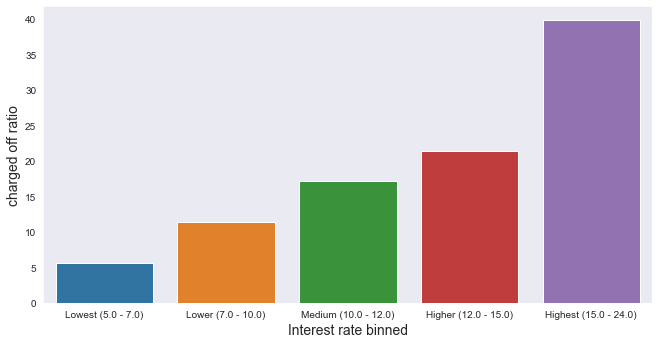

In [101]:
plt.figure(figsize=(24,12))
plt.subplot(2, 2, 2)
ax = sns.barplot(x=int_rate_qctg_vs_loan_status['int_rate_qctg'], y=int_rate_qctg_vs_loan_status['ratio'])
ax.set_xlabel('Interest rate binned',fontsize=14)
ax.set_ylabel('charged off ratio',fontsize=14)
plt.show()

Inference:
* Higher the interest rate higher is the `charged off` ratio
* For highest interest rate i.e 15 - 24, charge off ratio increases drastically

### dti_qctg vs loan_status

In [102]:
dti_qctg_vs_loan_status = loan.groupby(['dti_qctg', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_qctg_vs_loan_status['ratio'] = (dti_qctg_vs_loan_status['charged off']*100/dti_qctg_vs_loan_status['fully paid'])

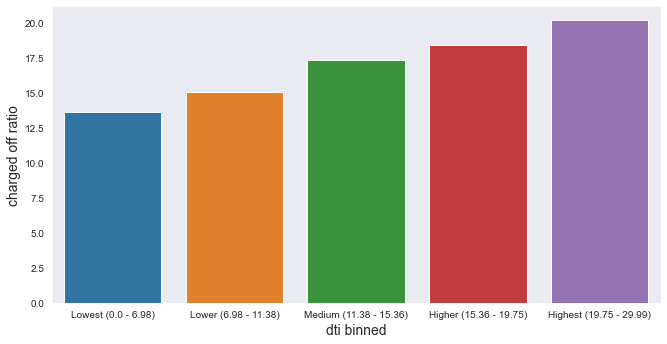

In [103]:
plt.figure(figsize=(24,12))
plt.subplot(2, 2, 2)
ax = sns.barplot(x=dti_qctg_vs_loan_status['dti_qctg'], y=dti_qctg_vs_loan_status['ratio'])
ax.set_xlabel('dti binned',fontsize=14)
ax.set_ylabel('charged off ratio',fontsize=14)
plt.show()

Inference:
* As `dti` increases, `charge off` ratio also increases

# Conclusion

We concluded our EDA here, Below we will list down impactful columns of Lending loan database as per the above analysis

### Minor impact
* Loan amount
* home ownership
* higher installment amount
* lower income
* proportional dti
* addr_state ('ne' state is however outlier due to very less loan amount compared to all other states)
* installment

### Major Impact
* Term(60 months)
* grade(c to g)
* issue year(the gap between fullypaid and charged off is increasing periodicially)
* loan purpose(small business, educational and renewable)
* interest rate(higher the rate, higher is the charge off ratio)